In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
Crimedata=pd.read_csv("C:\\Users\\HP\\Desktop\\ExcelR\\Assignment\\Assn 7 Clustering\\crime_data.csv")

In [3]:
Crimedata.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [4]:
Crimedata=Crimedata.rename(columns={'Unnamed: 0': 'City'})

In [5]:
Crimedata.head()

,City,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [6]:
#scaling the data using minmax Scalar
scaler = StandardScaler()
scaled_data = scaler.fit_transform(Crimedata.iloc[:,1:])

In [7]:
#HIERARCHICAL CLUSTERING or Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

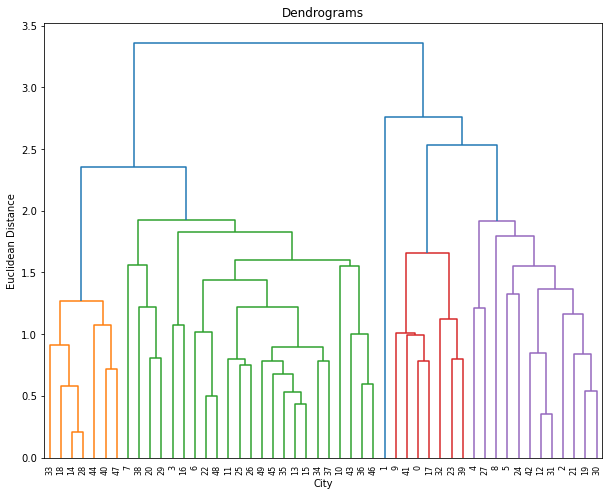

In [8]:
plt.figure(figsize=(10, 8))  
plt.title("Dendrograms") 
plt.xlabel("City")
plt.ylabel("Euclidean Distance")
dendrogram = sch.dendrogram(sch.linkage(scaled_data, method='average'))

In [9]:
#model initialization using AgglomarativeClustering method
clustering_model=AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'average')

In [10]:
clustering_predictionHRC=clustering_model.fit_predict(scaled_data)

In [37]:
clustering_predictionHRC

array([3, 2, 1, 0, 1, 1, 0, 0, 1, 3, 0, 0, 1, 0, 0, 0, 0, 3, 0, 1, 0, 1,
       0, 3, 1, 0, 0, 1, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0, 0, 3, 0, 3, 1, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [11]:
from sklearn import metrics
SilhouetteSCHRC=metrics.silhouette_score(scaled_data, clustering_predictionHRC , metric='euclidean')

In [12]:
print(SilhouetteSCHRC)

0.3636819420151221


In [13]:
#forming dataframe for Cluster Numbers
HRC_Clusters=pd.DataFrame(clustering_predictionHRC,columns=['Clusters'])

In [14]:
Crimedata['HRC_Clusters']=clustering_predictionHRC

In [15]:
Crimedata['HRC_Clusters']=Crimedata['HRC_Clusters'].replace(0,'HRC 1')
Crimedata['HRC_Clusters']=Crimedata['HRC_Clusters'].replace(1,'HRC 2')
Crimedata['HRC_Clusters']=Crimedata['HRC_Clusters'].replace(2,'HRC 3')
Crimedata['HRC_Clusters']=Crimedata['HRC_Clusters'].replace(3,'HRC 4')
Crimedata

,City,Murder,Assault,UrbanPop,Rape,HRC_Clusters
0,Alabama,13.2,236,58,21.2,HRC 4
1,Alaska,10.0,263,48,44.5,HRC 3
2,Arizona,8.1,294,80,31.0,HRC 2
3,Arkansas,8.8,190,50,19.5,HRC 1
4,California,9.0,276,91,40.6,HRC 2
5,Colorado,7.9,204,78,38.7,HRC 2
6,Connecticut,3.3,110,77,11.1,HRC 1
7,Delaware,5.9,238,72,15.8,HRC 1
8,Florida,15.4,335,80,31.9,HRC 2
9,Georgia,17.4,211,60,25.8,HRC 4


In [16]:
#K-MEANS CLUSTERING
from sklearn.cluster import KMeans

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


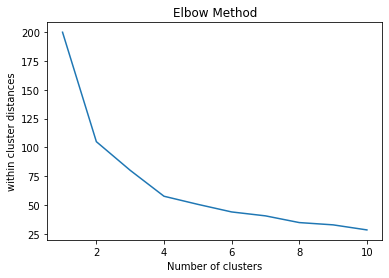

In [17]:
wcss = [] #wcss=within cluster distances i.e within cluster sum of squares
for i in range (1,11):
    kmeans= KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_) #kmeans.inertia_ = within cluster distances
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('within cluster distances')
plt.show()

In [18]:
#building new k-means cluster algorithm taking value of k=4
k_newclusters= KMeans(4,random_state=0)
k_newclusters.fit(scaled_data)

KMeans(n_clusters=4, random_state=0)

In [19]:
k_newclusters.labels_ #gives array of clusternumbers

array([3, 1, 1, 3, 1, 1, 0, 0, 1, 3, 0, 2, 1, 0, 2, 0, 2, 3, 2, 1, 0, 1,
       2, 3, 1, 2, 2, 1, 2, 0, 1, 1, 3, 2, 0, 0, 0, 0, 0, 3, 2, 3, 1, 0,
       2, 0, 0, 2, 2, 0])

In [20]:
metrics.silhouette_score(scaled_data, k_newclusters.labels_,metric='euclidean')

0.33968891433344395

In [21]:
Crimedata['kmeans_cluster']=k_newclusters.labels_

In [22]:
Crimedata.head()

,City,Murder,Assault,UrbanPop,Rape,HRC_Clusters,kmeans_cluster
0,Alabama,13.2,236,58,21.2,HRC 4,3
1,Alaska,10.0,263,48,44.5,HRC 3,1
2,Arizona,8.1,294,80,31.0,HRC 2,1
3,Arkansas,8.8,190,50,19.5,HRC 1,3
4,California,9.0,276,91,40.6,HRC 2,1


In [23]:
Crimedata.groupby('kmeans_cluster').agg(['mean']).reset_index()

,kmeans_cluster,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,5.656250,138.875000,73.875000,18.781250
1,1,10.815385,257.384615,76.000000,33.192308
2,2,3.600000,78.538462,52.076923,12.176923
3,3,13.937500,243.625000,53.750000,21.412500


In [24]:
Crimedata['kmeans_cluster']=Crimedata['kmeans_cluster'].replace(0,'KMC 1')
Crimedata['kmeans_cluster']=Crimedata['kmeans_cluster'].replace(1,'KMC 2')
Crimedata['kmeans_cluster']=Crimedata['kmeans_cluster'].replace(2,'KMC 3')
Crimedata['kmeans_cluster']=Crimedata['kmeans_cluster'].replace(3,'KMC 4')
Crimedata

,City,Murder,Assault,UrbanPop,Rape,HRC_Clusters,kmeans_cluster
0,Alabama,13.2,236,58,21.2,HRC 4,KMC 4
1,Alaska,10.0,263,48,44.5,HRC 3,KMC 2
2,Arizona,8.1,294,80,31.0,HRC 2,KMC 2
3,Arkansas,8.8,190,50,19.5,HRC 1,KMC 4
4,California,9.0,276,91,40.6,HRC 2,KMC 2
5,Colorado,7.9,204,78,38.7,HRC 2,KMC 2
6,Connecticut,3.3,110,77,11.1,HRC 1,KMC 1
7,Delaware,5.9,238,72,15.8,HRC 1,KMC 1
8,Florida,15.4,335,80,31.9,HRC 2,KMC 2
9,Georgia,17.4,211,60,25.8,HRC 4,KMC 4


In [25]:
Crimedata['kmeans_cluster'].value_counts()

KMC 1    16
KMC 3    13
KMC 2    13
KMC 4     8
Name: kmeans_cluster, dtype: int64

DBSCAN

In [26]:
from sklearn.cluster import DBSCAN

In [27]:
# intializing DBSCAN
clustering_model=DBSCAN(eps=0.9,min_samples=4)

In [28]:
# fitting the model 
clustering_model.fit(scaled_data)

DBSCAN(eps=0.9, min_samples=4)

In [29]:
# predicting labels by DBSCAN
predicted_labels=clustering_model.labels_

In [30]:
predicted_labels

array([-1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1,  0, -1,  0,  0,  0,  0,
       -1,  0, -1, -1, -1,  0, -1, -1,  0,  0, -1,  0, -1, -1, -1, -1,  0,
        0,  0, -1,  0, -1, -1,  0, -1, -1, -1, -1,  0, -1,  0,  0,  0],
      dtype=int64)

In [31]:
metrics.silhouette_score(scaled_data, predicted_labels,metric='euclidean')

0.266781916070482

In [32]:
Crimedata['DBSCAN_cluster']=predicted_labels

In [33]:
Crimedata.groupby('DBSCAN_cluster').agg(['mean'])

,Murder,Assault,UrbanPop,Rape
,mean,mean,mean,mean
DBSCAN_cluster,,,,
-1,9.76,217.766667,69.533333,25.726667
0,4.83,100.250000,59.550000,14.490000


In [34]:
Crimedata.head()

,City,Murder,Assault,UrbanPop,Rape,HRC_Clusters,kmeans_cluster,DBSCAN_cluster
0,Alabama,13.2,236,58,21.2,HRC 4,KMC 4,-1
1,Alaska,10.0,263,48,44.5,HRC 3,KMC 2,-1
2,Arizona,8.1,294,80,31.0,HRC 2,KMC 2,-1
3,Arkansas,8.8,190,50,19.5,HRC 1,KMC 4,-1
4,California,9.0,276,91,40.6,HRC 2,KMC 2,-1


In [35]:
Crimedata['DBSCAN_cluster'].value_counts()

-1    30
 0    20
Name: DBSCAN_cluster, dtype: int64

In [36]:
Crimedata

,City,Murder,Assault,UrbanPop,Rape,HRC_Clusters,kmeans_cluster,DBSCAN_cluster
0,Alabama,13.2,236,58,21.2,HRC 4,KMC 4,-1
1,Alaska,10.0,263,48,44.5,HRC 3,KMC 2,-1
2,Arizona,8.1,294,80,31.0,HRC 2,KMC 2,-1
3,Arkansas,8.8,190,50,19.5,HRC 1,KMC 4,-1
4,California,9.0,276,91,40.6,HRC 2,KMC 2,-1
5,Colorado,7.9,204,78,38.7,HRC 2,KMC 2,-1
6,Connecticut,3.3,110,77,11.1,HRC 1,KMC 1,0
7,Delaware,5.9,238,72,15.8,HRC 1,KMC 1,-1
8,Florida,15.4,335,80,31.9,HRC 2,KMC 2,-1
9,Georgia,17.4,211,60,25.8,HRC 4,KMC 4,-1
